In [1]:
import pandas as pd
import os
import numpy as np
import cvxpy as cp
from math import sqrt
from scipy import stats

In [115]:
path1 = os.path.abspath('C:/Users/soadn/Downloads/yndx.csv')
df1 = pd.read_csv(path1, names = [i for i in range(7)])

path2 = os.path.abspath('C:/Users/soadn/Downloads/sfor.l.csv')
df2 = pd.read_csv(path2, names = [i for i in range(7)])

path3 = os.path.abspath('C:/Users/soadn/Downloads/PSON.L.csv')
df3 = pd.read_csv(path3, names = [i for i in range(7)])

In [116]:
open1 = df1[1][1:].values.T
open2 = df2[1][1:].values.T
open3 = df3[1][1:].values.T
open11 = [float(item) for item in open1]
open22 = [float(item) for item in open2]
open33 = [float(item) for item in open3]

sizeofprofit = len(open1) - 1

profit1 = []
profit2 = []
profit3 = []

for i in range(sizeofprofit):
    profit1.append((open11[i+1] - open11[i])/open11[i] * 100)
for i in range(sizeofprofit):
    profit2.append((open22[i+1] - open22[i])/open22[i] * 100)
for i in range(sizeofprofit):
    profit3.append((open33[i+1] - open33[i])/open33[i] * 100)
    
profit11 = np.array(profit1)
profit22 = np.array(profit2)
profit33 = np.array(profit3)

m1 = np.mean(profit11)
m2 = np.mean(profit22)
m3 = np.mean(profit33)

data = np.vstack((profit11, profit22, profit33))

In [117]:
n = 3
mu = np.array([m1, m2, m3])
Cov = np.cov(data)
Cor = np.corrcoef(data)
R = np.linalg.cholesky(Cov)
print(mu,'\n')
print(Cov,'\n')
print(R)
print('\n', np.around(Cor, 3), '\n', sep='')

print(np.around(stats.pearsonr(profit11, profit22), 3), '\n', sep='')
print(np.around(stats.pearsonr(profit11, profit33), 3), '\n', sep='')
print(np.around(stats.pearsonr(profit33, profit22), 3), '\n', sep='')

[0.71676742 1.34934477 0.07847645] 

[[26.63077322 10.64949783  7.87867141]
 [10.64949783 37.78906199  2.94902004]
 [ 7.87867141  2.94902004 25.87832895]] 

[[ 5.16050126  0.          0.        ]
 [ 2.0636557   5.79054291  0.        ]
 [ 1.52672599 -0.03481828  4.8524452 ]]

[[1.    0.336 0.3  ]
 [0.336 1.    0.094]
 [0.3   0.094 1.   ]]

[0.336 0.001]

[0.3   0.002]

[0.094 0.351]



In [118]:
w = cp.Variable(n) 
gamma = input()
ret = w @ mu.T
risk = cp.norm(R.T @ w)
prob = cp.Problem(cp.Maximize(ret - gamma * risk), [cp.sum(w) == 1])
prob.solve()
print('\n', np.around(prob.value, 3),'\n', sep='')
print(np.around(w.value, 3))

0.4

-0.771

[0.338 0.476 0.186]


0.193
[ 0.408  0.982 -0.39 ] 

-0.771
[0.338 0.476 0.186] 

-1.579
[0.327 0.396 0.277] 

-2.36
[0.322 0.36  0.318] 

-3.132
[0.319 0.34  0.341] 



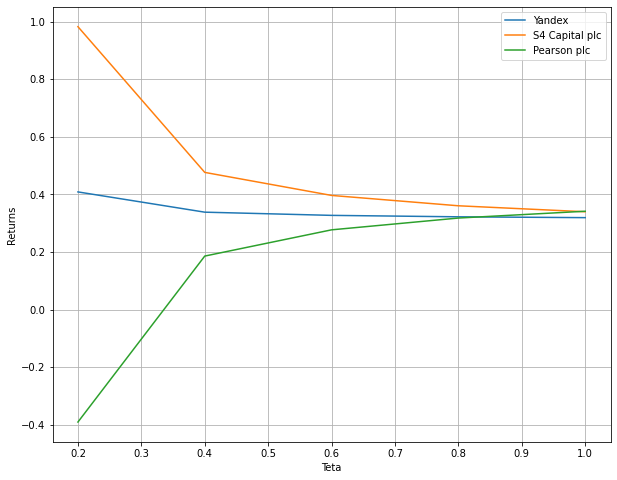

In [165]:
import matplotlib.pyplot as plt
teta = [0.2, 0.4, 0.6, 0.8, 1]
data1 = []
data2 = []
data3 = []
for i in teta:
    prob = cp.Problem(cp.Maximize(ret - i * risk), [#w >= 0,
        cp.sum(w) == 1])
    prob.solve()
    print(np.around(prob.value, 3))
    print(np.around(w.value, 3), '\n')
    data1.append(w.value[0])
    data2.append(w.value[1])
    data3.append(w.value[2])
    
#print([msft1, aapl1, yndx1])
plt.figure(figsize=(10, 8))
plt.plot(teta, data1, label='Yandex')
plt.plot(teta, data2, label='S4 Capital plc')
plt.plot(teta, data3, label='Pearson plc')

plt.legend()
plt.grid(True)
plt.xlabel("Teta")
plt.ylabel("Returns")
plt.show()

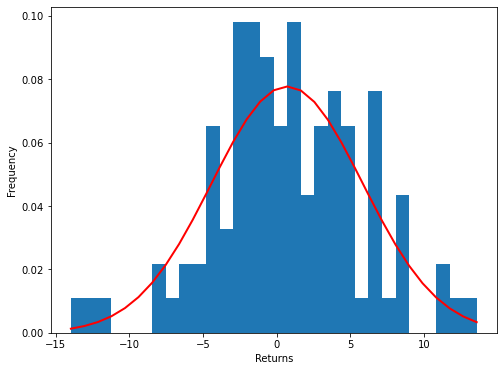

In [166]:
mu, sigma = m1, np.std(profit11)
plt.figure(figsize=(8, 6))
count, bins, ignored = plt.hist(profit11, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.show()

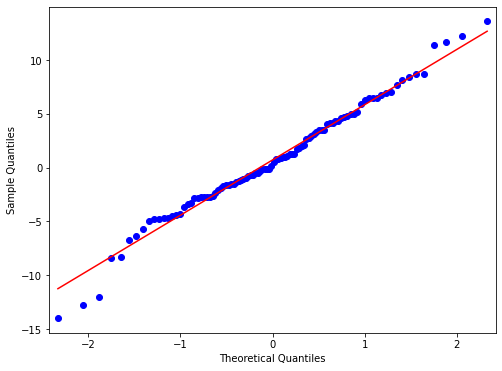

In [148]:
import statsmodels.api as sm
import pylab
sm.qqplot(profit11, line='s')
pylab.rcParams['figure.figsize'] = 8, 6
pylab.show()

In [149]:
JB, p_value = stats.jarque_bera(profit11)
print('JB =', JB, '\np-value =', p_value)

JB = 0.8968398175122974 
p-value = 0.6386364586797749


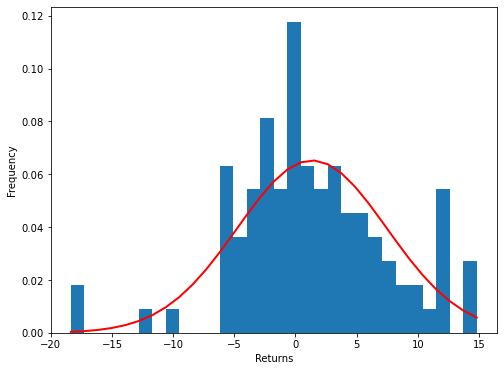

In [167]:
mu, sigma = m2, np.std(profit22)
plt.figure(figsize=(8, 6))
count, bins, ignored = plt.hist(profit22, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.show()

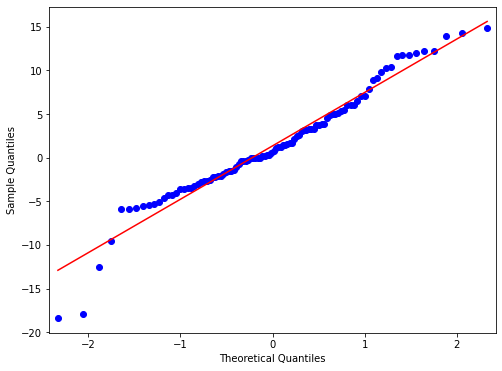

In [151]:
import statsmodels.api as sm
import pylab
sm.qqplot(profit22, line='s')
pylab.rcParams['figure.figsize'] = 8, 6
pylab.show()

In [153]:
JB, p_value = stats.jarque_bera(profit22)
print('JB =', JB, '\np-value =', p_value)

JB = 4.818008367629117 
p-value = 0.08990477864373148


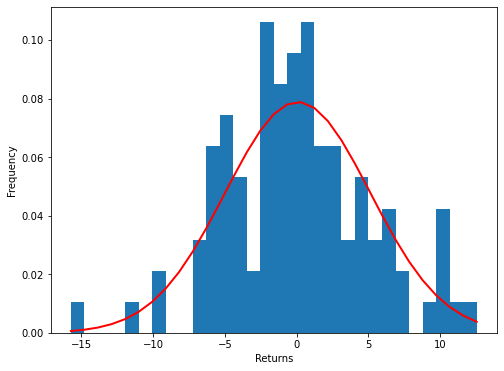

In [168]:
mu, sigma = m3, np.std(profit33)
plt.figure(figsize=(8, 6))
count, bins, ignored = plt.hist(profit33, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.show()

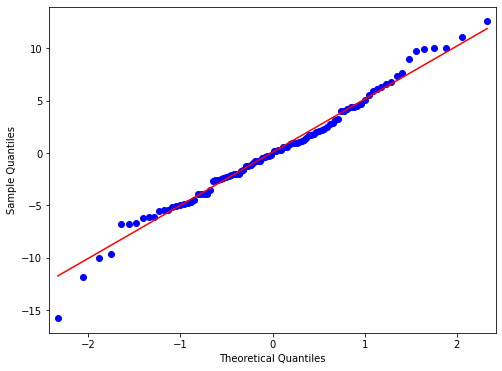

In [155]:
import statsmodels.api as sm
import pylab
sm.qqplot(profit33, line='s')
pylab.rcParams['figure.figsize'] = 8, 6
pylab.show()

In [156]:
JB, p_value = stats.jarque_bera(profit33)
print('JB =', JB, '\np-value =', p_value)

JB = 0.614906512396536 
p-value = 0.7353172382676809


In [171]:
n = 3
w1 = cp.Variable(n)
alpha = float(input())
beta = float(input())
z_beta = stats.norm.ppf(beta)
print('z_beta =', z_beta)
m0 = float(input())
m00 = np.array([m0, m0, m0])
mu1 = mu - m00
ret1 = w1 @ mu1.T
sigma = cp.norm(R.T @ w1)
prob = cp.Problem(cp.Maximize(ret1), [#w1 >= 0,
                                      1/z_beta * ret1 - sigma >= 1/z_beta * (alpha - m0)])
prob.solve()
print('\n', prob.value,'\n', sep='')
#print(np.around(w1.value, 5))
ww1 = w1.value
w4 = 1 - (ww1[0] + ww1[1] + ww1[2])
print(w1.value)
print('\n', w4, sep='')

-1
0.9
z_beta = 1.2815515655446004
0

0.016416098489274708

[0.06443653 0.05436172 0.0903868 ]

0.7908149588255587


0.85
0.02
[0.08  0.067 0.112] 0.74 

0.87
0.019
[0.073 0.062 0.103] 0.761 

0.89
0.017
[0.067 0.057 0.095] 0.781 

0.91
0.016
[0.062 0.052 0.086] 0.8 

0.93
0.014
[0.056 0.047 0.078] 0.819 

0.9500000000000001
0.013
[0.05  0.042 0.07 ] 0.838 



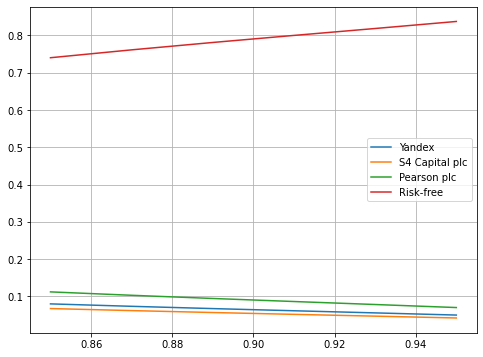

In [172]:
betas = 0.85
data11 = []
data22 = []
data33 = []
riskfree = []
alpha1 = -1
betass = []
m01 = 0
for i in range(6):
    print(betas)
    z_beta1 = stats.norm.ppf(betas)
    prob = cp.Problem(cp.Maximize(ret1), [w1 >= 0,
                                      1/z_beta1 * ret1 - sigma >= 1/z_beta1 * (alpha1 - m01)])
    betass.append(betas)
    prob.solve()
    data11.append(w1.value[0])
    data22.append(w1.value[1])
    data33.append(w1.value[2])
    ww1 = w1.value
    w4 = 1 - (ww1[0] + ww1[1] + ww1[2])
    riskfree.append(w4)
    betas += 0.02
    print(np.around(prob.value, 3))
    print(np.around(w1.value, 3), np.around(w4, 3), '\n')
    
plt.figure(figsize=(8, 6))
plt.plot(betass, data11, label='Yandex')
plt.plot(betass, data22, label='S4 Capital plc')
plt.plot(betass, data33, label='Pearson plc')
plt.plot(betass, riskfree, label='Risk-free')
plt.legend()
plt.grid(True)

In [107]:
np.sqrt(np.linalg.det(Cov))

145.00127171977223

In [108]:
np.linalg.inv(Cov)

array([[ 0.0460977 , -0.01200249, -0.0126667 ],
       [-0.01200249,  0.02982523,  0.00025537],
       [-0.0126667 ,  0.00025537,  0.04246965]])